In [1]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

import sys
sys.path.append('../')
import utils

## Hierarchical Clustering

In [2]:
# Load data
credit_score = pd.read_csv('../../data/credit_score.csv')

# Select features
df_features = credit_score.drop(['CUST_ID','CAT_GAMBLING',
       'CAT_DEBT', 'CAT_CREDIT_CARD', 'CAT_MORTGAGE', 'CAT_SAVINGS_ACCOUNT',
       'CAT_DEPENDENTS', 'CREDIT_SCORE', 'DEFAULT'], axis=1)

# Standardize features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)
df_scaled = pd.DataFrame(df_scaled,columns=df_features.columns)

In [3]:
# Transpose so that each row is a feature
df_transposed = df_scaled.transpose()

np.shape(df_transposed)

(78, 1000)

In [4]:
# Perform hierarchical clustering on features
linked = linkage(df_transposed, method='ward', metric='euclidean')

np.shape(linked)

(77, 4)

In [5]:
df_linked = pd.DataFrame(linked,
                         columns=['c1','c2','distance','size'])
df_linked[['c1','c2','size']] = df_linked[['c1','c2','size']].astype('int')

df_linked.head(10)

,c1,c2,distance,size
0,48,49,0.001115,2
1,12,13,0.110213,2
2,66,67,0.140091,2
3,54,55,2.917148,2
4,30,31,3.256809,2
5,36,37,4.094988,2
6,0,72,5.368175,2
7,18,19,5.881761,2
8,73,84,8.531166,3
9,41,71,9.644045,2


In [6]:
print(df_features.columns[48])
print(df_features.columns[49])

print(df_features.columns[12])
print(df_features.columns[13])

T_HOUSING_12
T_HOUSING_6
T_EDUCATION_12
T_EDUCATION_6


## Visualising the clusters

Saving figure LM3_dendrogram


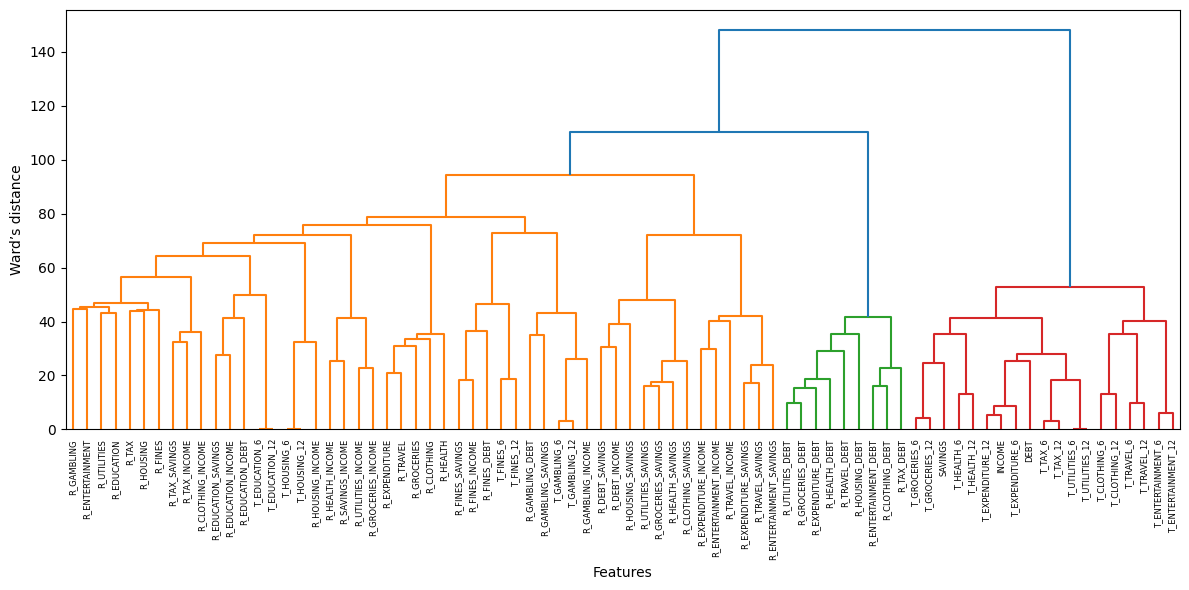

In [7]:
# Create a dendrogram to visualize the feature clustering
plt.figure(figsize=(12, 6))

dendrogram(linked, 
           orientation='top', 
           labels=df_transposed.index, 
           distance_sort='descending', 
           show_leaf_counts=True)

#plt.title('Hierarchical Feature Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Ward’s distance')

# Save figure
utils.save_fig("LM3_dendrogram")

## Group features into clusters

In [8]:
num_clusters = 10  # Adjust the number of clusters as needed
labels = fcluster(linked, t=num_clusters, criterion='maxclust')

In [9]:
# Find correlation between features and credit score
correlations = []
for col in df_features.columns:
    corr = credit_score['CREDIT_SCORE'].corr(credit_score[col])
    corr = round(corr, 3)
    correlations.append(corr)

In [10]:
df_clusters = pd.DataFrame(list(zip(df_features.columns, labels, correlations)),
                           columns=['feature','cluster','corr'])

df_clusters['abs_corr'] = df_clusters['corr'].abs()

df_clusters.sort_values(by=['cluster','abs_corr'], ascending=[True,False], inplace=True)
df_clusters.reset_index(drop=True, inplace=True)
df_clusters.head(10)

,feature,cluster,corr,abs_corr
0,DEBT,1,-0.327,0.327
1,T_ENTERTAINMENT_12,1,0.109,0.109
2,T_ENTERTAINMENT_6,1,0.084,0.084
3,T_GROCERIES_6,1,-0.081,0.081
4,SAVINGS,1,0.079,0.079
5,T_GROCERIES_12,1,-0.073,0.073
6,T_HEALTH_12,1,0.057,0.057
7,T_TAX_12,1,0.038,0.038
8,T_TAX_6,1,0.036,0.036
9,INCOME,1,0.029,0.029


In [11]:
df_clusters['cluster'].value_counts()

1     19
10    15
2      9
4      7
3      6
5      5
6      5
7      5
8      4
9      3
Name: cluster, dtype: int64

## Sense check the clusters

In [12]:
c2_features = df_clusters[df_clusters['cluster']==2]['feature'].tolist()
c3_features = df_clusters[df_clusters['cluster']==3]['feature'].tolist()

print(c2_features)
print(c3_features)

['R_EXPENDITURE_DEBT', 'R_UTILITIES_DEBT', 'R_GROCERIES_DEBT', 'R_TAX_DEBT', 'R_ENTERTAINMENT_DEBT', 'R_HEALTH_DEBT', 'R_CLOTHING_DEBT', 'R_TRAVEL_DEBT', 'R_HOUSING_DEBT']
['R_ENTERTAINMENT_INCOME', 'R_ENTERTAINMENT_SAVINGS', 'R_EXPENDITURE_SAVINGS', 'R_EXPENDITURE_INCOME', 'R_TRAVEL_SAVINGS', 'R_TRAVEL_INCOME']


Saving figure LM3_corr_matrix_c2


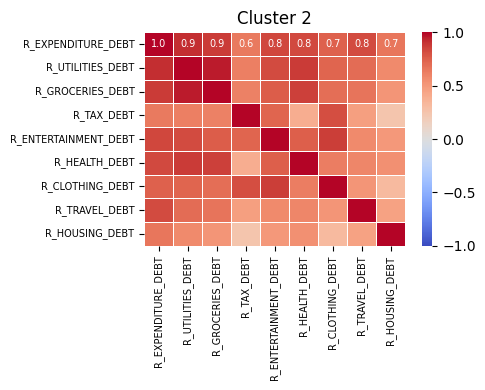

In [13]:
# Plot correlations for features in cluster 2
corr = credit_score[c2_features].corr()

plt.figure(figsize=(5, 4))
sns.heatmap(corr, 
            annot=True, 
            cmap='coolwarm', 
            linewidths=0.5, 
            fmt=".1f",
            annot_kws={"size": 7},
            vmin=-1, vmax=1)
plt.title('Cluster 2')
plt.xticks(size=7)
plt.yticks(size=7)

# Save figure
utils.save_fig("LM3_corr_matrix_c2",tight_layout=True)

Saving figure LM3_corr_matrix_c3


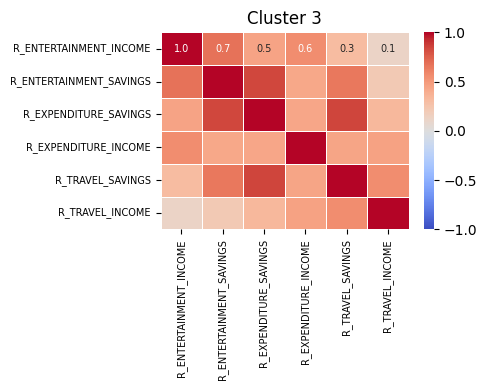

In [14]:
# Plot correlations for features in cluster 2
corr = credit_score[c3_features].corr()

plt.figure(figsize=(5, 4))
sns.heatmap(corr, 
            annot=True, 
            cmap='coolwarm', 
            linewidths=0.5, 
            fmt=".1f",
            annot_kws={"size": 7},
            vmin=-1, vmax=1)
plt.title('Cluster 3')
plt.xticks(size=7)
plt.yticks(size=7)

# Save figure
utils.save_fig("LM3_corr_matrix_c3",tight_layout=True)

Saving figure LM3_corr_matrix_comb


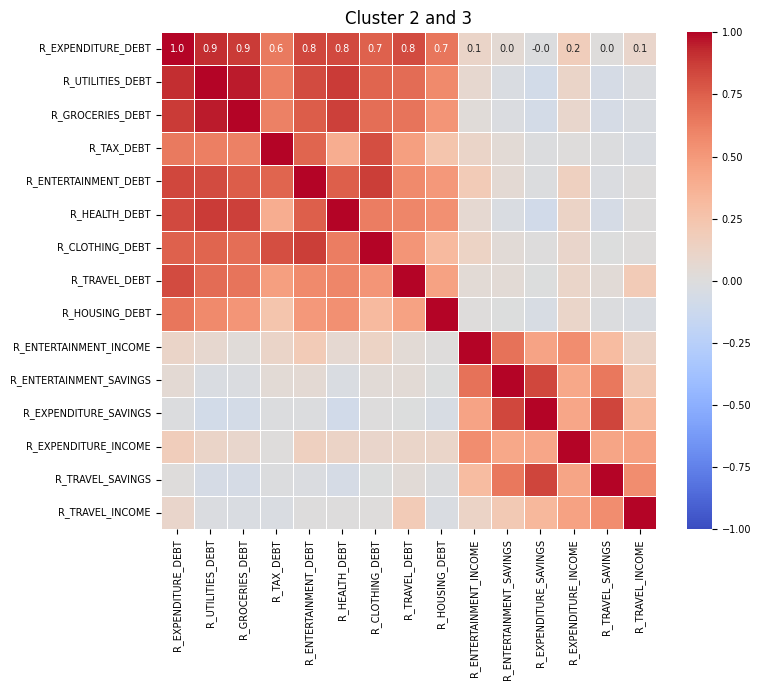

In [16]:
# Plot correlations for features in cluster 2 and 3
corr = df_features[np.append(c2_features,c3_features)].corr()

# plot correlation matrix
plt.figure(figsize=(8, 7))
sns.heatmap(corr, 
            annot=True, 
            cmap='coolwarm', 
            linewidths=0.5, 
            fmt=".1f",
            annot_kws={"size": 7},
            vmin=-1, vmax=1)
plt.title('Cluster 2 and 3')
plt.xticks(size=7)
plt.yticks(size=7)

# change size of colorbar labels
cbar = plt.gcf().axes[-1]
cbar.tick_params(labelsize=7)
plt.xticks(size=7)
plt.yticks(size=7)

# Save figure
utils.save_fig("LM3_corr_matrix_comb",tight_layout=True)